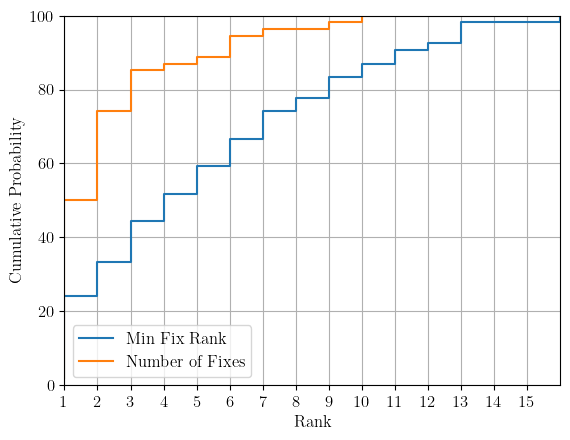

In [8]:
from utils.analysis_utils import *
from utils.plot_utils import *
import numpy as np
from benchmark_consts import *

merged = verus_rd1_ranks.copy()

for q, fixes in verus_rd2_ranks.items():
    adjusted = {}
    for fix, rank in fixes.items():
        adjusted[fix] = rank + 10
    merged[q] = adjusted

best_ranks = []
num_fixes = []

for q, fixes in merged.items():
    best_ranks.append(min(fixes.values()))
    num_fixes.append(len(fixes))

best_ranks = np.sort(best_ranks)
num_fixes = np.sort(num_fixes)
assert len(num_fixes) == len(best_ranks)

cdf = np.arange(1, len(best_ranks) + 1) * 100 / len(best_ranks)
plt.step(best_ranks, cdf, where='post', label='Min Fix Rank')
plt.step(num_fixes, cdf, where='post', label='Number of Fixes')


plt.xlabel('Rank')
plt.xlim(1, 16)
plt.xticks(np.arange(1, 16, 1))
plt.ylim(0, 100)

plt.ylabel('Cumulative Probability')
# plt.title('Cumulative Distribution Function (CDF)')
plt.grid(True)
plt.legend()
plt.show()
plt.close()